In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

original_img = Image.open('abathur.jpg')

In [2]:
def img_reduction(image, factor):
    h = image.size[0]
    w = image.size[1]
    print("Original Shape : {}".format(np.array(image).shape))
    image_re = image.resize([h//factor, w//factor])
    print("Reducted Shape : {}".format(np.array(image_re).shape))
    return image_re

def img_reshape(x):
    return x.reshape(x.shape[0]*x.shape[1],x.shape[2])

def img_backshape(x, h, w):
    return x.reshape(h, w, 3)

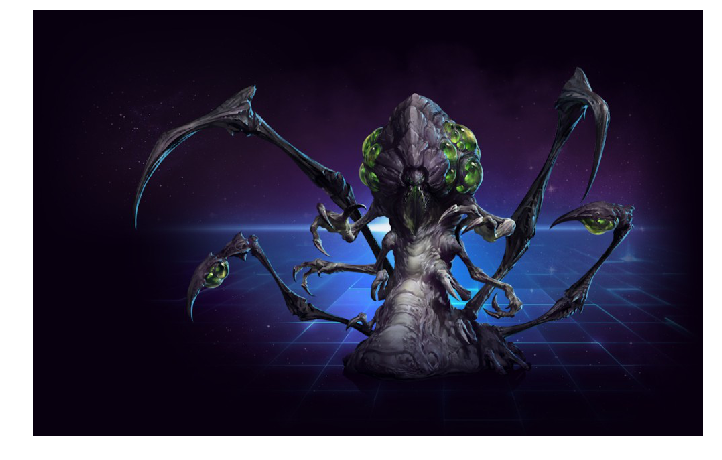

Shape : (636, 1000, 3)


In [3]:
plt.figure(figsize=(12,12))
plt.axis('off')
img = np.array(original_img)
plt.imshow(img)
plt.show()
print("Shape : {}".format(img.shape))

Original Shape : (636, 1000, 3)
Reducted Shape : (159, 250, 3)


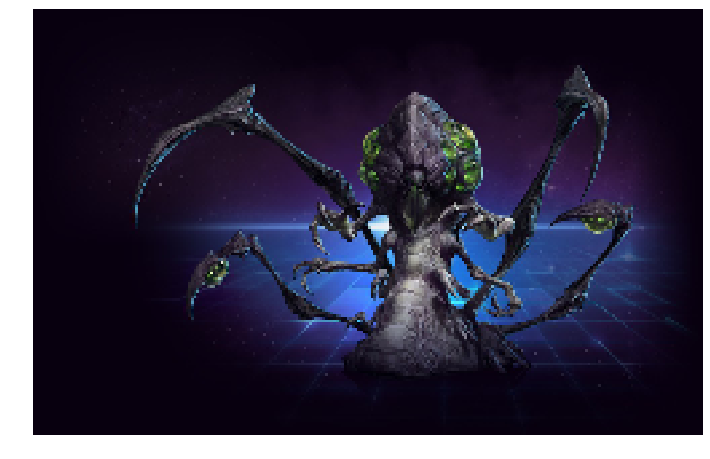

In [4]:
plt.figure(figsize=(12,12))
plt.axis('off')
img_re = img_reduction(original_img, 4)
img_re = np.array(img_re)
plt.imshow(img_re)
plt.show()

In [5]:
# A = img_reshape(img_re.copy())
# A.shape

A = img_reshape(img)
A.shape

(636000, 3)

In [6]:
k = 12
p = 3
mu = np.array([np.linspace(5, 255, k),
               np.linspace(5, 255, k),
               np.linspace(5, 255, k)]).T
mu = mu.astype(int)
c = np.empty(k, dtype=object)
n_iter = 30

In [7]:
dist = np.empty([A.shape[0], k])

In [8]:
print(mu.shape)
print(dist.shape)
print(A.shape)

(12, 3)
(636000, 12)
(636000, 3)


\begin{align*}
\text{Repeat}&\{ \\
&\text{for $i=1$ to $m$} \\    
&\quad \text{$c_i$ := index (from 1 to $k$) of cluster centroid closest to $x^{(i)}$} \\     
&\text{for $k=1$ to $k$} \\
&\quad \text{$\mu_k$ := average (mean) of points assigned to cluster $k$} \\
&\}
\end{align*}

\begin{align*}
c_k &= \{n: k = \arg \min_k \lVert x_n - \mu_k \rVert^2\}\\
\mu_k &= \frac{1}{\lvert c_k \rvert} \sum_{n \in c_k}x_n
\end{align*}

# weighted kp-means

In [9]:
for iteration in range(n_iter):
    for i in range(k):
        dist[:,i] = np.linalg.norm(A-mu[i], 2, axis=1)
        
    min_idx_matrix = np.argmin(dist, axis=1)
    for i in range(0, k-p):
        c[i] = np.where(min_idx_matrix == i)
        mu[i] = np.mean(A[c[i]], axis=0)

    for i in range(k-p, k):
        c[i] = np.where(min_idx_matrix == i)
        ci_dist = dist[c[i], i].copy().reshape(-1,1)
        # w = np.exp(ci_dist/np.mean(ci_dist) - 1)
        w = np.exp(ci_dist)/np.sum(np.exp(ci_dist))
        # w*A[c[i]] elemental wise multiplication
        mu[i] = np.sum(w*A[c[i]], axis=0)
    mu = mu.astype(int)
    print(iteration, np.mean(dist))

0 190.5790534818558
1 185.09646210688655
2 167.94786992591267
3 162.5310966139979
4 158.85525872913217
5 158.74822038108238
6 153.8754564343807
7 156.70648444988137
8 162.0999649726347
9 158.05732579334742
10 154.93394279268824
11 156.19683317299186
12 153.698592925568
13 157.01262263142877
14 157.73641413116863
15 155.68587824205892
16 161.15186902096778
17 159.7570535353296
18 149.03192937692054
19 156.58174501607363
20 148.65823074935452
21 154.8066105440583
22 148.5753836606921
23 153.6878048576014
24 148.90279203807358
25 159.8205302899319
26 148.05986761403068
27 151.87398190147402
28 147.2831766143097
29 155.75264548986448


In [10]:
A_back = img_backshape(mu[min_idx_matrix], img.shape[0], img.shape[1])

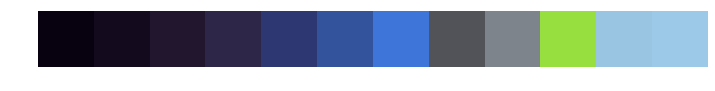

In [11]:
plt.figure(figsize=(12,6))
plt.imshow(mu.reshape(1,k,3))
plt.axis('off')
plt.show()

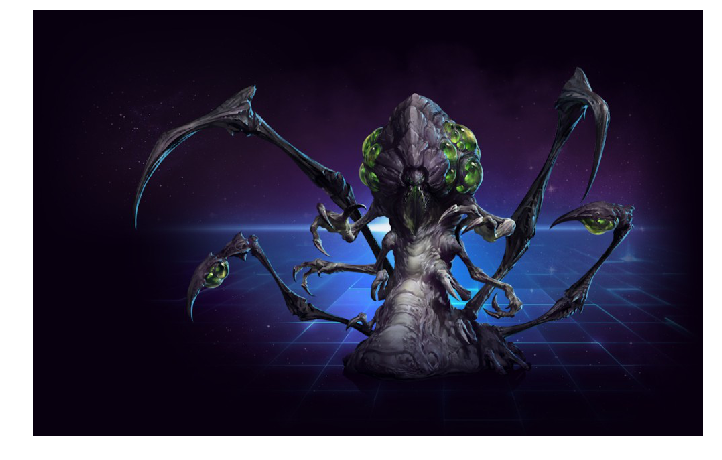

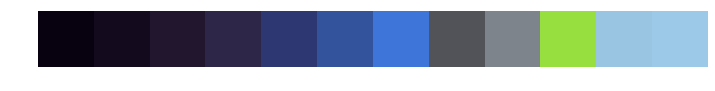

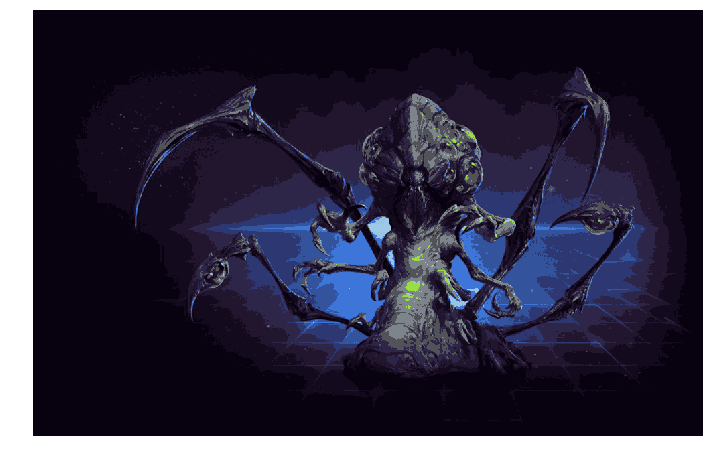

In [12]:
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(img)
plt.show()

plt.figure(figsize=(12,6))
plt.imshow(mu.reshape(1,k,3))
plt.axis('off')
plt.show()

plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(A_back)
plt.show()

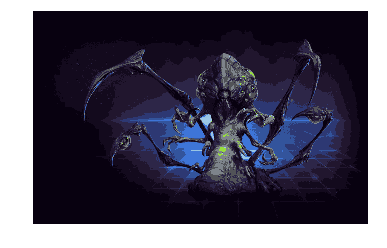

In [13]:
plt.axis('off')
plt.imshow(A_back)
plt.show()